# Learning and Decision Making

## Laboratory 3: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the princess saving problem described in the Homework and which you described as a POMDP.

Recall that:

* The princess can be in any one of two towers: Tower *A* and Tower *B*. The knight must decide which tower do invade to rescue the princess. 

* The knight can try to _peer_ at the towers, to figure out where the princess may be. 

* When the agent peers, it sees the princess in the right location with a probability of 0.9, and at the wrong location with probability 0.1.

* Whenever the knight invades a tower, the "world" resets.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy` array with the cost describing the problem. Make sure that the costs lie in the interval [0,1] and that the cost for peering is in the middle between the cost for saving and being captured.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [127]:
import numpy as np
np.set_printoptions(precision=3)
# states space
# 0 -> A 
# 1 -> B
states = [0,1]
print("\nStates: %s" % states)

# TODO PRINTS
# actions space
# 0 -> A
# 1 -> B
# 2 -> S
actions = [0,1,2]
print("\nActions: %s" % actions)

# observations space
# 0 -> A
# 1 -> B
# 2 -> None
observations = [0,1,2]
print("\nObservations: %s" % observations)

# Gamma
gamma = 0.9
print("\nGamma: %.2f" % gamma)

P=[[],[],[]]
P[0] = np.array([[0.5,0.5], [0.5,0.5]])
P[1] = np.array([[0.5,0.5], [0.5,0.5]])
P[2] = np.array([[1,0], [0,1]])

print("\nTransition Probability Matrix for each Action:")
for action, p_matrix in enumerate(P):
    actions_map =["A","B", "Scope"] # actions mapper for pretty print
    print("%s:\n%s\n" % (actions_map[action],p_matrix))

O =[[],[],[]]
O[0] = np.array([[0,0,1], [0,0,1]]) 
O[1] = np.array([[0,0,1], [0,0,1]]) 
O[2] = np.array([[0.9,0.1,0], [0.1,0.9,0]]) 
print("\nObservation Probability Matrix for each Action:")
for action, p_matrix in enumerate(O):
    actions_map =["A","B", "Scope"] # actions mapper for pretty print
    print("%s:\n%s\n" % (actions_map[action],p_matrix))

# Cost function
C = np.array([[0,1,0.5], [1,0,0.5]]) 
print("Cost function:\n%s" % C)


States: [0, 1]

Actions: [0, 1, 2]

Observations: [0, 1, 2]

Gamma: 0.90

Transition Probability Matrix for each Action:
A:
[[0.5 0.5]
 [0.5 0.5]]

B:
[[0.5 0.5]
 [0.5 0.5]]

Scope:
[[1 0]
 [0 1]]


Observation Probability Matrix for each Action:
A:
[[0 0 1]
 [0 0 1]]

B:
[[0 0 1]
 [0 0 1]]

Scope:
[[0.9 0.1 0. ]
 [0.1 0.9 0. ]]

Cost function:
[[0.  1.  0.5]
 [1.  0.  0.5]]


### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [128]:
import random
pi = np.array([[1/3,1/3,1/3],[1/3,1/3,1/3]])
print("Pi:",pi)

act2_states, act2_actions, act2_observations = [], [], []
state, action = random.choice(states), np.random.choice(actions, p=pi[state])

for i in range(10000):
    # Random action and next state 
    next_state, next_action = np.random.choice(states, p=P[action][state]), np.random.choice(actions, p=pi[state])
    act2_observations.append(np.random.choice(observations, p=O[next_action][state]))
    act2_states.append(state)
    act2_actions.append(action)
    state, action = next_state, next_action
    
# transform in np arrays
act2_states, act2_actions, act2_observations = np.array(act2_states), np.array(act2_actions), np.array(act2_observations)
print(act2_states)
print(act2_actions)
print(act2_observations)

    

Pi: [[0.333 0.333 0.333]
 [0.333 0.333 0.333]]
[1 0 0 ... 0 0 0]
[1 2 2 ... 1 0 2]
[1 0 0 ... 2 0 2]


---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the initial belief is $\mathbf{b}_0=[0.5, 0.5]$. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-3}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [129]:
# intial_belief
belief = np.array([0.5, 0.5])
beliefs = [belief]

def belief_update(b, a, o):
    new_belief = (b.dot(P[a])).dot(np.diag(O[a][:,o]))
    
    return new_belief / sum(new_belief)

def validateBelief(next_belief, beliefs):
    return not (beliefs == next_belief).all(1).any() and not [b for b in beliefs if np.linalg.norm(b-next_belief) < 1e-3]
                                                              
for i in range(1,10000):
    next_belief = belief_update(belief,act2_actions[i],act2_observations[i-1])
    if validateBelief(next_belief,beliefs):
        beliefs.append(next_belief)
    belief = next_belief

print("Beliefs:\n",beliefs)

Beliefs:
 [array([0.5, 0.5]), array([0.1, 0.9]), array([0.9, 0.1]), array([0.988, 0.012]), array([0.012, 0.988]), array([0.001, 0.999]), array([0.999, 0.001]), array([9.998e-01, 1.524e-04]), array([1.524e-04, 9.998e-01])]


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [130]:
import time
# Initial policy is 0.33 in every cell of the matrix, defined in activity2
pi = np.array([[1/3,1/3,1/3],[1/3,1/3,1/3]])
# Initialize policy iteration variables and starttime
quit = False
Q=[[],[],[]]
t0 = time.time()

# Policy iteration loop
while not quit:
    # Cost associated with the current (looped) policy     
    C_pi = np.diag(pi[:,0]).dot(C[:,0,None]) + np.diag(pi[:,1]).dot(C[:,1,None]) + np.diag(pi[:,2]).dot(C[:,2,None])
    
    # Probability Matrix associated with the current (looped) policy
    P_pi = np.diag(pi[:,0]).dot(P[0]) + np.diag(pi[:,1]).dot(P[1]) + np.diag(pi[:,2]).dot(P[2])
    
    # Cost-to-go associated with the current (looped) policy
    J = np.dot(np.linalg.inv(np.identity(2) - gamma* P_pi), C_pi)

    # Get Q-functions for each action
    for j in range(3):
        Q[j] = C[:,j,None] + gamma * P[j].dot(J)

    # Calculate new policy
    Pi_new = np.zeros((2,3))
    for j in range(3):
        Pi_new[:,j,None] = np.isclose(Q[j], np.min([Q[0],Q[1],Q[2]], axis=0), atol=1e-8, rtol=1e-8).astype(int)
 
    # Normalize calculated policy
    Pi_new = Pi_new / np.sum(Pi_new, axis=1, keepdims = True)
    
    # Update policy iteration loop variables
    quit = (pi == Pi_new).all()
    pi = Pi_new   
    i += 1
    
print("Time to compute: %.6f seconds" % (time.time() - t0))
print("Optimal cost-to-go:\n%s" % J)
print("The optimal policy:\n%s" % pi)

Time to compute: 0.001525 seconds
Optimal cost-to-go:
[[0.]
 [0.]]
The optimal policy:
[[1. 0. 0.]
 [0. 1. 0.]]


---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [131]:
mls = []
av = []
q_mdp = []
# from activity 4
Q_mdp = np.concatenate((Q[0],Q[1],Q[2]),axis=1)
print("Q_pi:\n",Q_mdp)
for b in beliefs:
    # MLS
    mls.append([b, actions_map[np.argmax(pi[np.argmax(b)])]])
    # AV
    av.append([b, actions_map[np.argmax(np.dot(b,pi))]])
    # Q-MDP
    q_mdp.append([b, actions_map[np.argmin(np.dot(b,Q_mdp))]])
    
print("MLS:\n",mls)
print("AV:\n",av)
print("Q-MDP:\n", q_mdp)


Q_pi:
 [[0.  1.  0.5]
 [1.  0.  0.5]]
MLS:
 [[array([0.5, 0.5]), 'A'], [array([0.1, 0.9]), 'B'], [array([0.9, 0.1]), 'A'], [array([0.988, 0.012]), 'A'], [array([0.012, 0.988]), 'B'], [array([0.001, 0.999]), 'B'], [array([0.999, 0.001]), 'A'], [array([9.998e-01, 1.524e-04]), 'A'], [array([1.524e-04, 9.998e-01]), 'B']]
AV:
 [[array([0.5, 0.5]), 'A'], [array([0.1, 0.9]), 'B'], [array([0.9, 0.1]), 'A'], [array([0.988, 0.012]), 'A'], [array([0.012, 0.988]), 'B'], [array([0.001, 0.999]), 'B'], [array([0.999, 0.001]), 'A'], [array([9.998e-01, 1.524e-04]), 'A'], [array([1.524e-04, 9.998e-01]), 'B']]
Q-MDP:
 [[array([0.5, 0.5]), 'A'], [array([0.1, 0.9]), 'B'], [array([0.9, 0.1]), 'A'], [array([0.988, 0.012]), 'A'], [array([0.012, 0.988]), 'B'], [array([0.001, 0.999]), 'B'], [array([0.999, 0.001]), 'A'], [array([9.998e-01, 1.524e-04]), 'A'], [array([1.524e-04, 9.998e-01]), 'B']]


---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors

$$
\left\{
\begin{bmatrix}
2.795\\
3.795
\end{bmatrix},
\begin{bmatrix}
3.795\\
2.795
\end{bmatrix},
\begin{bmatrix}
3.105\\
3.105
\end{bmatrix}\right\}$$

corresponding to the actions 'Invade Tower A', 'Invade Tower B' and 'Peer', respectively. Represent the optimal cost-to-go function and compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

Alpha Vectors:
 [[2.795, 3.795], [3.795, 2.795], [3.105, 3.105]]


<IPython.core.display.Javascript object>


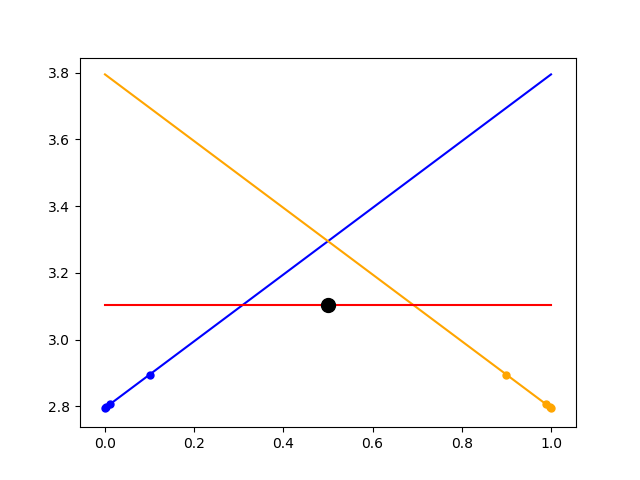



Belief: [0.5 0.5] 
MDP heuristics: A 
POMDP action: Peer


Belief: [0.1 0.9] 
MDP heuristics: B 
POMDP action: Invade Tower B


Belief: [0.9 0.1] 
MDP heuristics: A 
POMDP action: Invade Tower A


Belief: [0.988 0.012] 
MDP heuristics: A 
POMDP action: Invade Tower A


Belief: [0.012 0.988] 
MDP heuristics: B 
POMDP action: Invade Tower B


Belief: [0.001 0.999] 
MDP heuristics: B 
POMDP action: Invade Tower B


Belief: [0.999 0.001] 
MDP heuristics: A 
POMDP action: Invade Tower A


Belief: [9.998e-01 1.524e-04] 
MDP heuristics: A 
POMDP action: Invade Tower A


Belief: [1.524e-04 9.998e-01] 
MDP heuristics: B 
POMDP action: Invade Tower B


In [132]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import math

act5_actions =["Invade Tower A","Invade Tower B", "Peer"]
act_colors = ["blue", "orange","red"]
def genGraph(array,c):
    plt.plot(array, color=c)
    plt.show()

def chooseAction(belief,vecs):
    minimum = math.inf
    action = math.inf
    for i, vec in enumerate(vecs):
        if minimum > (vec[0] + (vec[1]-vec[0])*belief[1]):
            minimum = vec[0] + (vec[1]-vec[0])*belief[1]
            action = i
    return minimum, action

def drawPoint(b, a, y):
    size, color, Zorder = (100, "black", 3) if actions_map[a] != q_mdp[i][1] else (25, act_colors[a], 1)
    plt.scatter(b[1],y,c=color, s= size, zorder=Zorder)

alpha_vectors = [[2.795,3.795],[3.795,2.795],[3.105,3.105]]
print("Alpha Vectors:\n", alpha_vectors)
genGraph(alpha_vectors[0],"blue")
genGraph(alpha_vectors[1],"orange")
genGraph(alpha_vectors[2],"red")


for i in range(len(beliefs)):
    b = beliefs[i]
    y, a = chooseAction(b,alpha_vectors)
    drawPoint(b,a,y)
    print("\n\nBelief:",b,"\nMDP heuristics:",q_mdp[i][1],"\nPOMDP action:",act5_actions[a])

Como podemos verificar pelo gráfico, o único belief cuja ação calculada pelas heuristicas do MDP não coincide é o belief [0.5,0.5], cuja cor no gráfico difere da cor no alpha vector em que aparece em vez de ser vemelho é preto com 4x o tamanho. Pelas heuristicas chegamos à acção "Invade Tower A" para o belief [0.5,0.5] e pelo POMDP chegamos à acção "Peer". 